In [25]:
import numpy as np
X = np.random.randn(10000).reshape(100, 100)
y = np.floor(np.random.uniform(0, 2, 100))

In [31]:
import pandas as pd
X = pd.DataFrame(X)
X.colmuns = range(100)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.284385,-0.069825,0.284738,-0.752948,0.349826,-0.163748,-0.425376,-0.753337,0.031751,0.335536,...,-0.893156,-0.875552,0.956198,-1.618249,0.075045,-2.098033,-0.630941,0.151300,0.246968,-0.632792
1,-0.575526,0.842174,-0.534870,-0.965309,0.352672,1.240350,-1.816404,0.246665,-1.979540,-0.173514,...,0.894468,-0.256536,-0.322760,1.646252,0.779893,-1.084472,-0.200123,0.680591,-0.234346,0.085812
2,0.260345,-1.719107,-1.318798,-1.274770,-1.758525,0.865388,0.460007,-0.610226,1.531732,0.901999,...,-1.678902,0.807168,-0.086187,-0.945953,0.132720,0.391762,-1.658642,0.380555,-1.193959,0.077103
3,2.301515,-1.269553,1.849453,-0.093893,1.902646,0.430922,0.482804,0.384996,0.721514,-1.226935,...,-0.682480,-1.154709,-2.402467,-1.475353,-1.421135,-1.102360,1.117381,0.388573,0.411764,0.381833
4,0.642067,-1.151502,1.332994,-1.073370,0.124428,-0.447967,1.626735,-0.326874,-0.995912,1.310935,...,0.731702,-0.496959,0.572802,0.661010,-2.387142,1.088603,0.115181,0.261115,0.218188,0.126067


# 一、scikit-learn中树算法

In [21]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

In [22]:
model.fit(X, y)
# display the relative importance of each attribute
print(model.feature_importances_)

[0.01550405 0.00924798 0.00878009 0.00597553 0.01016925 0.00915028
 0.00949347 0.01142367 0.00982796 0.01554886 0.00779507 0.008017
 0.00957713 0.00711539 0.01362321 0.00623502 0.01734913 0.00846494
 0.00781846 0.00621753 0.00893169 0.02255772 0.01395344 0.01176637
 0.01099962 0.00577555 0.01281543 0.0106026  0.01173355 0.01463866
 0.0110022  0.00560212 0.00819476 0.00957876 0.0128636  0.00574975
 0.00750202 0.00792955 0.01078001 0.00403791 0.00957406 0.00964473
 0.00767621 0.00905706 0.01047778 0.00869599 0.01174337 0.00787922
 0.00961259 0.00707236 0.00899453 0.0088671  0.00718371 0.01281138
 0.0110408  0.00625079 0.01604461 0.00815894 0.0113668  0.00701234
 0.00716176 0.01002502 0.00951226 0.0084228  0.0097567  0.00728835
 0.01247004 0.00380741 0.00886343 0.01101012 0.00742713 0.01168707
 0.01294176 0.01380887 0.0144604  0.0282857  0.0109253  0.01162493
 0.01092298 0.00748974 0.01079496 0.00972387 0.00970121 0.00995962
 0.00712969 0.01072807 0.01074593 0.01096554 0.00637318 0.012569

# 二、RFE搜索算法

另一种算法是基于对特征子集的高效搜索，从而找到最好的子集，意味着演化了的模型在这个子集上有最好的质量。递归特征消除算法（RFE）是这些搜索算法的其中之一，Scikit-Learn库同样也有提供。

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False]
[32  1 18 98 95 16 81 44 42  2 28 15 97  5 88 76 38 19 85 82 54 11 22 84
 68 73  1 52 67 89 27 45 75 91  7 71 37 77 87 59 14  3 41 47 49 83 69 79
 58 57 36 93 72 50 55 51 23 64 39 53 70 20 62 35 33 92 34 96  9 12 43  4
 86 13 60 74 80 21 90 78 48 24  1 29 31 56 30 46 25 94 63 40  8 65 10 66
  6 17 61 26]


# 三、利用LassoCV进行特征选择

In [27]:
#!/usr/bin/python
 
import pandas as pd
import numpy as np
import csv as csv
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [64]:
train = pd.read_csv('D:\\data\datastart.csv', header=0)        # Load the train file into a dataframe
X = train[train.columns[4:]]

y = np.array(train['y']).reshape(-1,1)

In [65]:
# 分割数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

from sklearn import preprocessing

# 1. 基于mean和std的标准化
scaler = preprocessing.StandardScaler().fit(X_train)
train_data = scaler.transform(X_train)
test_data = scaler.transform(X_test)

scaler = preprocessing.StandardScaler().fit(y_train)
train_y = scaler.transform(y_train)
test_y = scaler.transform(y_test)

In [73]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train_data, train_y.ravel(), scoring="neg_mean_squared_error", cv = 3))
    return(rmse)

#调用LassoCV函数，并进行交叉验证，默认cv=3
model_lasso = LassoCV(alphas = [0.1,1,0.001, 0.0005]).fit(train_data, train_y.ravel())

In [74]:
#模型所选择的最优正则化参数alpha
print(model_lasso.alpha_)

#各特征列的参数值或者说权重参数，为0代表该特征被模型剔除了
print(model_lasso.coef_)

#输出看模型最终选择了几个特征向量，剔除了几个特征向量
coef = pd.Series(model_lasso.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

#输出所选择的最优正则化参数情况下的残差平均值，因为是3折，所以看平均值
print(rmse_cv(model_lasso).mean())

0.0005
[ 0.55605034  0.34832439  0.51436818  0.03227944  0.24693111 -0.10680498
  0.07202839  0.38067335  0.07983973 -0.6106806  -0.49068157  0.01620156
  0.0049026   0.        ]
Lasso picked 13 variables and eliminated the other 1 variables
0.6281486222878435


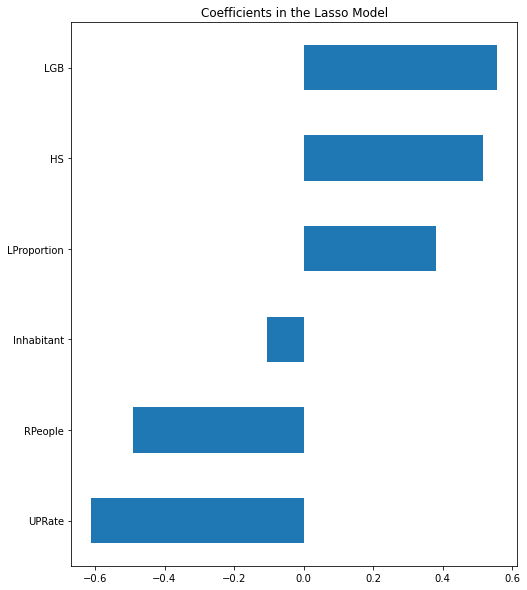

In [75]:
#画出特征变量的重要程度，这里面选出前3个重要，后3个不重要的举例
imp_coef = pd.concat([coef.sort_values().head(3),
                     coef.sort_values().tail(3)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

# 四、利用图表分析特征以及特征间的关系

In [76]:
# 略

# 五、逐步回归